In [66]:

# set up imports
import pandas as pd, numpy as np, seaborn as sns
from tabulate import tabulate
import statsmodels
import arch
import matplotlib
matplotlib.use('qt5agg')

# configure plot style
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (7,2.75)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.8
save_plot_to =  r'C:\\Users\joche\OneDrive\03 TUM - TUM-BWL\Semester 8\01 Bachelorarbeit\04 Results\Plots/'

In [3]:
# load data from excel file
mydateparser = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
btc = pd.read_excel('Data/BTC_closing.xlsx',squeeze=True, parse_dates=[0], index_col=0, date_parser=mydateparser)

# crop data: 2015-08-07 to 2020-06-26
start_date = '2015-08-07'
end_date = '2020-06-26'
btc = btc[start_date : end_date]

In [70]:
# Create btc returns and squared returns
btc_log = np.log(btc)
btc_returns = btc_log.diff().dropna()
btc_returns_squared = btc_returns.mul(btc_returns)

# Plot btc returns and btc squared returns
fig_1 = plt.plot(btc_returns, label= r'$r_{btc}$')
plt.plot(btc_returns_squared, label= r'$r^2_{btc}$')
plt.legend(loc='upper left')

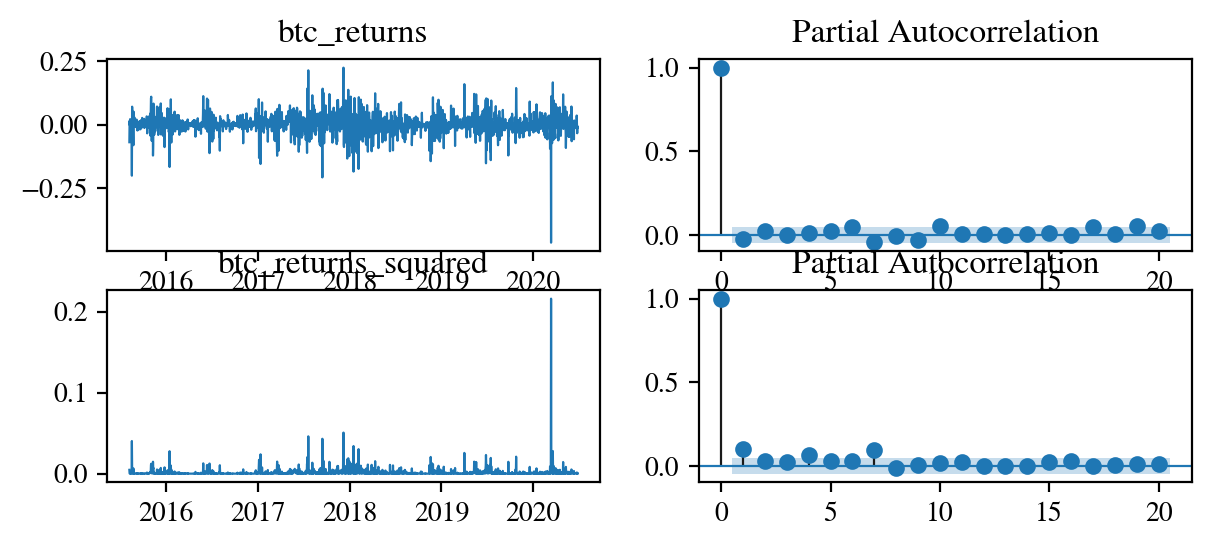

In [69]:
# plot pacf for returns and squared returns
from statsmodels.graphics.tsaplots import plot_pacf
fig_2, axs = plt.subplots(2,2)
axs[0][0].plot(btc_returns)
axs[0][0].set_title('btc_returns')
axs[1][0].plot(btc_returns_squared)
axs[1][0].set_title('btc_returns_squared')
plot_pacf(btc_returns, ax= axs[0][1], lags=20)
plot_pacf(btc_returns_squared, ax= axs[1][1], lags=20)

In [86]:
# fit ARCH model to the returns, which is scaled by 100
from arch import arch_model
model = arch_model(btc_returns)
model_fitted = model.fit()
model_fitted.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.503373103356091e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: -3366.9366872478413
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3366.936675891816
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


C:\Users\joche\Anaconda3\lib\site-packages\arch\univariate\base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:                3366.94
Distribution:                  Normal   AIC:                          -6725.87
Method:            Maximum Likelihood   BIC:                          -6703.92
                                        No. Observations:                 1785
Date:                Fri, Aug 28 2020   Df Residuals:                     1781
Time:                        14:15:50   Df Model:                            4
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.3276e-03  9.801e-04      2.375  1.756e-02 [4.066e-04,4.249e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.2407e-05  5.467e-06      5.928  3.063e-09 [2.169e-05,4.312e-05]
alpha[1]       0.1000  3.362e-02      2.975  2.933e-03   [3.411e-02,  0.166]
beta[1]        0.8800  2.586e-02     34.027 8.979e-254     [  0.829,  0.931]
============================================================================

Covariance estimator: robust
"""

In [100]:
# save current model as LaTeX to .txt file
with open(save_plot_to+'ARCH_GARCH_logs_LaTeX.txt', 'a') as myfile:
    myfile.write(model_fitted.summary().as_latex()+'\n\n')

In [79]:
# fit ARCH(1) model to the returns
from arch import arch_model
model = arch_model(btc_returns, mean='constant', vol='ARCH', p=1)
model_fitted = model.fit()
model_fitted.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 5216.030060773461
Iteration:      2,   Func. Count:     11,   Neg. LLF: 5359.485708705615
Iteration:      3,   Func. Count:     18,   Neg. LLF: 4979.830367628077
Iteration:      4,   Func. Count:     23,   Neg. LLF: 4979.539723334206
Iteration:      5,   Func. Count:     27,   Neg. LLF: 4979.539719672934
Iteration:      6,   Func. Count:     30,   Neg. LLF: 4979.539719672924
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4979.539719672934
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -4979.54
Distribution:                  Normal   AIC:                           9965.08
Method:            Maximum Likelihood   BIC:                           9981.54
                                        No. Observations:                 1785
Date:                Fri, Aug 28 2020   Df Residuals:                     1782
Time:                        14:00:17   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2116  9.128e-02      2.318  2.045e-02 [3.269e-02,  0.391]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         13.6225      1.950      6.985  2.856e-12   [  9.800, 17.445]
alpha[1]       0.1651  5.949e-02      2.776  5.510e-03 [4.852e-02,  0.282]
==========================================================================

Covariance estimator: robust
"""

TypeError: unsupported operand type(s) for ^: 'float' and 'int'